## Assignment:

Deadline : 09.03.2016 Wed  18:59

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe you approach.



Your Name : İdil Gün

In [32]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import sys

df_arac = pd.read_csv(u'data/arac.csv',sep=';')

# Polynomial Fitting

In [58]:
def TestPolynomialFitter( paramX , paramY , paramDegree, paramBaseYear, paramXtest, paramYactual):
    BaseYear = paramBaseYear

    x = paramX
    y = paramY

    # Setup the vandermonde matrix
    N = len(x)
    degree = paramDegree

    A = np.hstack((np.power(x,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(-1,55)).T
    A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

    # Solve the least squares problem
    w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

    f = A2*w_ls
    plt.plot(x+BaseYear, y, 'o-')
    plt.plot(xx+BaseYear, f, 'r')

    plt.xlabel('Years')
    plt.ylabel('Number of Vehicles')

    plt.show()
    
    xTest = paramXtest
    ATest = np.hstack((np.power(xTest,i) for i in range(degree+1)))
    
    fTest = ATest*w_ls

    yActual = paramYactual

    error = abs(fTest - yActual)
    
    TotalError = 0
    
    for i in range (0, error.size):
        TotalError = TotalError + error[i]
    
    print ("Total Error From Test Data: ", TotalError)
    
    return

In [59]:
def PredictionPolynomialFitter( paramX , paramY , paramDegree, paramBaseYear):
    BaseYear = paramBaseYear
    
    x = paramX
    y = paramY

    # Setup the vandermonde matrix
    N = len(x)
    degree = paramDegree
    
    A = np.hstack((np.power(x,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(-1,55)).T
    A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

    # Solve the least squares problem
    w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

    f = A2*w_ls
    plt.plot(x+BaseYear, y, 'o-')
    plt.plot(xx+BaseYear, f, 'r')

    plt.xlabel('Years')
    plt.ylabel('Number of Vehicles')

    plt.show()
    
    xPrediction = np.matrix([2016,2017,2018,2019,2020]).T-BaseYear

    APrediction = np.hstack((np.power(xPrediction,i) for i in range(degree+1)))

    fPrediction = APrediction*w_ls*1000000

    print("Prediction for 2016 : ", fPrediction[0])
    print("Prediction for 2017 : ", fPrediction[1])
    print("Prediction for 2018 : ", fPrediction[2])
    print("Prediction for 2019 : ", fPrediction[3])
    print("Prediction for 2020 : ", fPrediction[4])

## Minibus

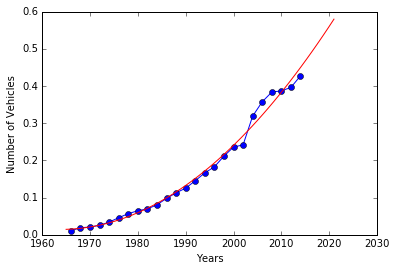

Total Error :  [[ 0.24544689]]


In [60]:
# Use the data set from the beginning
BaseYear = 1966

# Use every other year from the data as training data
xMinibus = np.matrix(df_arac.Year[::2]).T-BaseYear
yMinibus = np.matrix(df_arac.Minibus[::2]).T/1000000

#change the degree to minimize error between test data and model
degree = 2

# Use remaining years from the data as training data
x_test_Minibus = np.matrix(df_arac.Year[1::2]).T-BaseYear
y_actual_Minibus = np.matrix(df_arac.Minibus[1::2]).T/1000000

PolynomialFitter(xMinibus,yMinibus, degree, BaseYear, x_test_Minibus , y_actual_Minibus)

<strong>It's possible to play with the degree parameter and find the following Total Error Results:</strong>
<br/>
degree = 1 : 0.82860902
<br/>
degree = 2 : 0.24544689
<br/>
degree = 3 : 0.2523265
<br/>
So, I have concluded, to stop at degree = 2 is the best polynomial fit for this data set.
<br/>
<br/>
We can now use all available data as training data before making a prediction

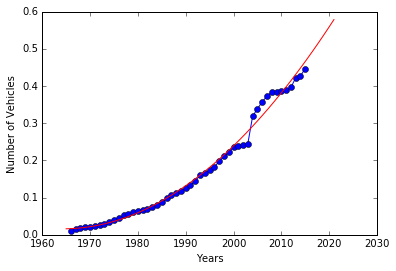

Prediction for 2016 :  [[ 483840.34040816]]
Prediction for 2017 :  [[ 502096.93094838]]
Prediction for 2018 :  [[ 520702.96021793]]
Prediction for 2019 :  [[ 539658.42821683]]
Prediction for 2020 :  [[ 558963.33494506]]


In [62]:
x_Prediction_Minibus = np.matrix(df_arac.Year[:]).T-BaseYear
y_Prediction_Minibus = np.matrix(df_arac.Minibus[:]).T/1000000

PredictionPolynomialFitter( x_Prediction_Minibus , y_Prediction_Minibus , 2, BaseYear)

## Bus

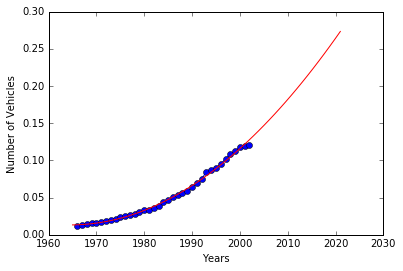

Total Error :  [[ 0.26669183]]


In [63]:
# Use the data set from the beginning
BaseYear = 1966

# Here I will try a different approach and use the first 37 years as training data
xBus = np.matrix(df_arac.Year[:37]).T-BaseYear
yBus = np.matrix(df_arac.Bus[:37]).T/1000000

#change the degree to minimize error between test data and model
degree = 2

# Use the last 12 years as test data
x_test_Bus = np.matrix(df_arac.Year[37:]).T-BaseYear
y_actual_Bus = np.matrix(df_arac.Bus[37:]).T/1000000

PolynomialFitter(xBus,yBus, degree, BaseYear, x_test_Bus , y_actual_Bus)

<strong>It's possible to play with the degree parameter and find the following Total Error Results:</strong>
<br/>
degree = 1 : 0.78981773
<br/>
degree = 2 : 0.26669183
<br/>
degree = 3 : 0.30881949
<br/>
So, again I have concluded, to stop at degree = 2 is the best polynomial fit for this data set.
<br/>
<br/>
We can now use all available data as training data before making a prediction

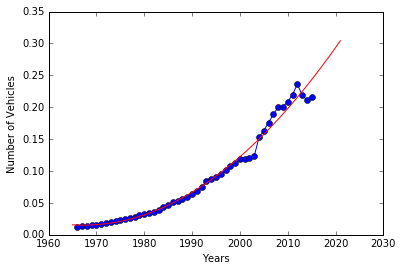

Prediction for 2016 :  [[ 252912.63663265]]
Prediction for 2017 :  [[ 262782.22077431]]
Prediction for 2018 :  [[ 272852.49676886]]
Prediction for 2019 :  [[ 283123.46461631]]
Prediction for 2020 :  [[ 293595.12431665]]


In [64]:
x_Prediction_Bus = np.matrix(df_arac.Year[:]).T-BaseYear
y_Prediction_Bus = np.matrix(df_arac.Bus[:]).T/1000000

PredictionPolynomialFitter( x_Prediction_Bus , y_Prediction_Bus , 2, BaseYear)

# Auto Regressive Model

In [135]:
def TestArModelFitter( paramY_1 , paramY, paramDegree, paramY_1test, paramYactual):

    y_1 = paramY_1
    y = paramY

    # Setup the vandermonde matrix
    degree = paramDegree

    A = np.hstack((np.power(y_1,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(-0.01,0.4)).T
    A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

    # Solve the least squares problem
    w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

    f = A2*w_ls
    plt.plot(y_1, y, 'o-')
    plt.plot(xx, f, 'r')

    plt.xlabel('Number of Vehicles A Year Ago')
    plt.ylabel('Number of Vehicles')

    plt.show()
    
    xTest = paramY_1test
    ATest = np.hstack((np.power(xTest,i) for i in range(degree+1)))
    
    fTest = ATest*w_ls

    yActual = paramYactual

    error = abs(fTest - yActual)
    
    TotalError = 0
    
    for i in range (0, error.size):
        TotalError = TotalError + error[i]
    
    print ("Total Error From Test Data: ", TotalError)
    
    return

In [136]:
def PredictionArModelFitter( paramY_1 , paramY , paramDegree):

    y_1 = paramY_1
    y = paramY

    # Setup the vandermonde matrix
    degree = paramDegree

    A = np.hstack((np.power(y_1,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(-0.01,0.4)).T
    A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

    # Solve the least squares problem
    w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

    f = A2*w_ls
    plt.plot(y_1, y, 'o-')
    plt.plot(xx, f, 'r')

    plt.xlabel('Number of Vehicles A Year Ago')
    plt.ylabel('Number of Vehicles')

    plt.show()
    
    y_N = paramY[-1]
    
    y_N1 = (w_ls[0] + y_N*w_ls[1] ) 
    y_N2 = (w_ls[0] + y_N1*w_ls[1] ) 
    y_N3 = (w_ls[0] + y_N2*w_ls[1] ) 
    y_N4 = (w_ls[0] + y_N3*w_ls[1] ) 
    y_N5 = (w_ls[0] + y_N4*w_ls[1] ) 

    print("Prediction for 2016 : ", y_N1 * 1000000)
    print("Prediction for 2017 : ", y_N2 * 1000000)
    print("Prediction for 2018 : ", y_N3 * 1000000)
    print("Prediction for 2019 : ", y_N4 * 1000000)
    print("Prediction for 2020 : ", y_N5 * 1000000)
    


## Minibus

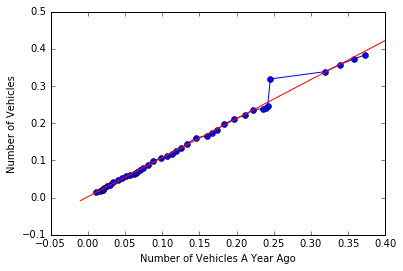

Total Error From Test Data:  [[ 2.82098225]]


In [137]:
# Use first 42 y values as input to the model
y_1Minibus = np.matrix(df_arac.Minibus[:42]).T/1000000
yMinibus = np.matrix(df_arac.Minibus[1:43]).T/1000000

degree = 1

# Use remaining y values as test data
y_1_test_Minibus = np.matrix(df_arac.Year[42:-1]).T/1000000
y_actual_Minibus = np.matrix(df_arac.Minibus[43:]).T/1000000

TestArModelFitter(y_1Minibus,yMinibus, degree, y_1_test_Minibus , y_actual_Minibus)

Changing the degree has not resulted in significant changes in the error so for the sake of simplicity in predicition the degree is kept as 1
<br/>
We can now use all available data as training data before making a prediction

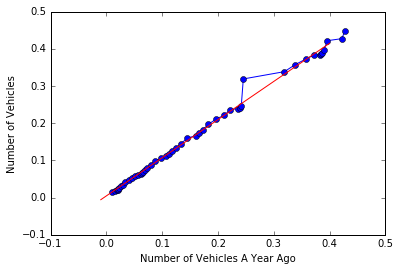

Prediction for 2016 :  [[ 462879.88202739]]
Prediction for 2017 :  [[ 479348.97946092]]
Prediction for 2018 :  [[ 496239.82283696]]
Prediction for 2019 :  [[ 513563.21236119]]
Prediction for 2020 :  [[ 531330.22481447]]


In [138]:
y_1_Prediction_Minibus = np.matrix(df_arac.Minibus[:-1]).T/1000000
y_Prediction_Minibus = np.matrix(df_arac.Minibus[1:]).T/1000000

PredictionArModelFitter( y_1_Prediction_Minibus , y_Prediction_Minibus , 1)

## Bus

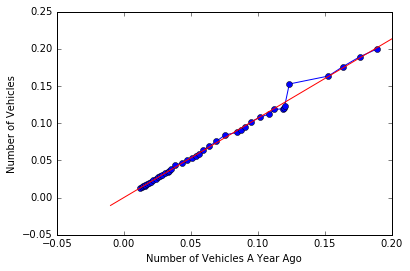

Total Error From Test Data:  [[ 1.49734042]]


In [128]:
# Use first 42 y values as input to the model
y_1Bus = np.matrix(df_arac.Bus[:42]).T/1000000
yBus = np.matrix(df_arac.Bus[1:43]).T/1000000

degree = 1

# Use remaining y values as test data
y_1_test_Bus = np.matrix(df_arac.Year[42:-1]).T/1000000
y_actual_Bus = np.matrix(df_arac.Bus[43:]).T/1000000

TestArModelFitter(y_1Bus,yBus, degree, y_1_test_Bus , y_actual_Bus)

Changing the degree has not resulted in significant changes in the error so for the sake of simplicity in predicition the degree is kept as 1
<br/>
We can now use all available data as training data before making a prediction

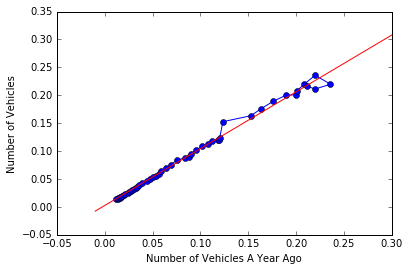

Prediction for 2016 :  [[ 223073.33167593]]
Prediction for 2017 :  [[ 229698.18023446]]
Prediction for 2018 :  [[ 236442.66793069]]
Prediction for 2019 :  [[ 243308.95534581]]
Prediction for 2020 :  [[ 250299.24207929]]


In [126]:
y_1_Prediction_Bus = np.matrix(df_arac.Bus[:-1]).T/1000000
y_Prediction_Bus = np.matrix(df_arac.Bus[1:]).T/1000000

PredictionArModelFitter( y_1_Prediction_Bus , y_Prediction_Bus , 1)

### Which model would you prefer? Polynomial or AR

I would prefer polynomial fitting because the error values for this model is much lower than the AR model.
<br/>
Further while making predictions for the future, the input is also a predicted value for the AR model so it can be said that it gets much less stable.
Also while building the model we neglect a set of information we have, which is that these numbers are collected a year a part from each other. Then when we use the last value of y to predict 2016 in the AR model, we are actually using this.